
## Section A. Model Complexity and Model Selection

### Question 1 [KNN Regressor, 20 Marks]

1.  Implement the KNN regressor function:knn(train.data, train.label, test.data, K=3)
   which takes the training data and their labels (continuous values), the test set,
   and the size of the neighborhood (K). It should return the regressed
   values for the test data points. When choosing the neighbors, you can use
   the Euclidean distance function to measure the distance between a pair of
   data points.

In [2]:
# Load the libraries for wrangling and plotting data
library(reshape)
library(ggplot2)

Warning message:
"package 'reshape' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"

In [3]:
# Load the train and the test set
train <- read.csv("Task1A_train.csv")
test <- read.csv("Task1A_test.csv")

# Split the data into input values and corresponding labels
train.data <- train['x1']
train.label <- train[, 2]

test.data <- test['x1']
test.label <- test[, 2]

In [4]:
# KNN function to return the k nearest elements using euclidean distance
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # Initialize the predicted value vector
    test.label <- 0.0
    
    ## for each test sample...
    for (i in 1:test.len){
        
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]  # returns indices of 4 nearest neighbours
                
        ###... and calculate the predicted labels according to the average value      
        avg <- mean(train.label[nn])
        
        # Store the average value as label
        test.label[i]<- round(avg, 2)

    }
    
    ## return the class labels as output
    return (test.label)
}

In [5]:
# Test the regressor for k = 4
label = knn(train.data, train.label, test.data, K=4)
label

[1]  0.77  0.77  0.78  0.79  0.85  0.87  0.92  1.00  1.08  1.19  1.28  1.43
[13]  1.52  1.62  1.69  1.81  1.97  2.18  2.50  2.84  3.20  3.60  4.12  4.46
[25]  4.95  5.51  5.80  6.28  6.62  6.93  7.36  7.70  8.35  8.77  9.81 10.78
[37] 11.90 13.23 14.31 15.28 15.28 15.28

2. Plot the training and the testing errors versus 1/K for K=1,..,20 in one plot,
   using the Task1A_train.csv and Task1A_test.csv datasets provided for
   this assignment. Save the plot in your Jupyter Notebook file for
   Question 1.

In [6]:
# Dataframe to store the Root mean square errors
rmse <- data.frame('K'=1:20)

# Iterate for k = 1 to 20
for (k in 1: 20){
    
    # Predict labels on the train set
    predicted.train <- knn(train.data, train.label, train.data, K=k)
    
    # Predict labels on the test set
    predicted.test <- knn(train.data, train.label, test.data, K=k)
    
    # Calculate RMSE on the train set
    rmse[k,'Train RMSE'] <- sqrt(mean((predicted.train - train.label)^2))
    
    # Calculate RMSE on the test set
    rmse[k,'Test RMSE'] <- sqrt(mean((predicted.test - test.label)^2))
}

# Check the error values
rmse

K,Train RMSE,Test RMSE
1,0.0000000,1.2998938
2,0.3499388,1.4578629
3,0.3101996,1.3019363
4,0.3865969,1.3616945
5,0.3982163,1.1743894
6,0.5323376,1.2132826
7,0.6633842,1.0389315
8,0.7938364,1.0854437
9,0.9474527,0.9769486
10,1.0779423,1.0233372


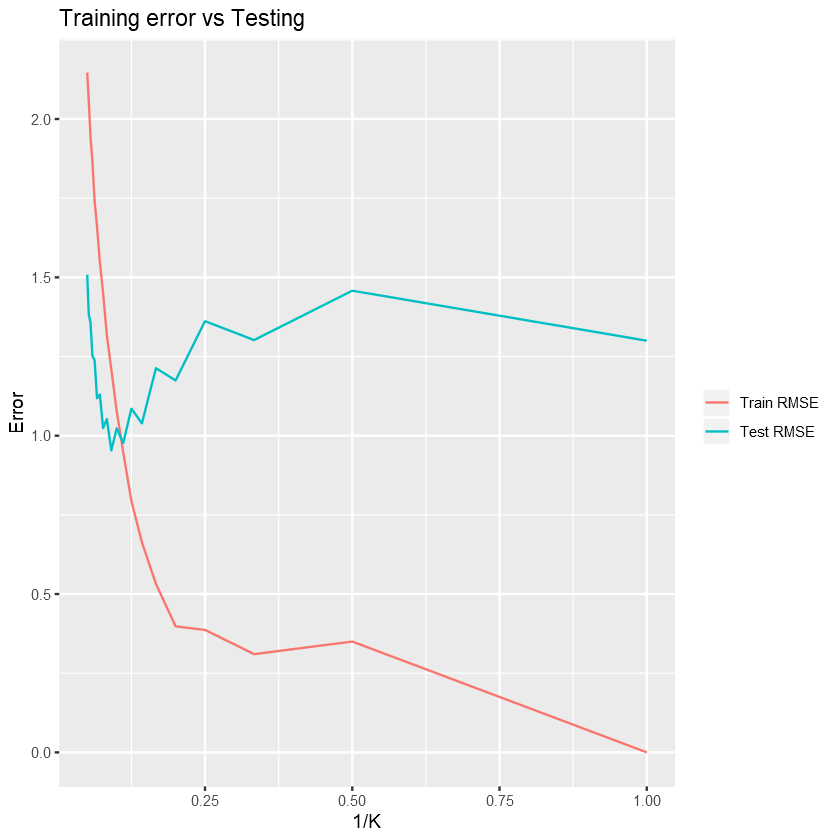

In [7]:
# reshape for visualization
rmse.m <- melt(rmse, id='K')
names(rmse.m) <- c('K', 'Type', 'Error')

# plot RMSE of predictions vs target values for train and test data sets
ggplot(data=rmse.m, aes(x=1/K, y=Error, color=Type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) +
       ggtitle("Training error vs Testing") + theme_grey()

3. Report (in your Jupyter Notebook file) the optimum value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in the previous part (Part II).

**Answer:** 
* From the above graph, the optimum value of "K" in terms of testing error is **9** (i.e. for 1/K ~ 0.11). 
* It can be observed from the graph that as we increase the value of K, the training error increases. 
* The error on the train data is lowest when K=0, however, the error on the test data is highest for same value of K and as the value of K increases train error increases whereas test error decreases. 
* Thus, it can be interpreted that lower values of K (i.e., K<9) represents over-fitting.
* The optimum value of K is the point of intersection of train and test error which is K=9. As the value of K increases, the number of nearest nodes (neighbours) increases which results in a very simple model. Hence, increase in the value of K results in under-fitting.